<img src="images/umcoffeebg.png" alt="Example Image" width="1300" style="display: block; margin: 0 auto;">

<h1 style="color: #774936; text-align: center; font-size: 36px; font-weight: 500;">&#9749; <u>Importing Libraries</u> &#9749;</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import calendar
import warnings
warnings.filterwarnings('ignore')

<h1 style="color: #774936; text-align: center; font-size: 36px; font-weight: 500">&#9749; <u>Load Dataset</u> &#9749;</h1>

In [2]:
df = pd.read_csv("dataset/coffee_sales.csv")

In [3]:
df.sample(10)

,date,datetime,cash_type,card,money,coffee_name
526,2024-05-19,2024-05-19 21:15:41.761,card,ANON-0000-0000-0188,37.72,Cappuccino
564,2024-05-22,2024-05-22 21:24:49.584,card,ANON-0000-0000-0180,37.72,Cappuccino
1376,2024-08-25,2024-08-25 09:24:22.265,card,ANON-0000-0000-0545,32.82,Cappuccino
1209,2024-08-09,2024-08-09 09:53:34.553,card,ANON-0000-0000-0476,23.02,Americano
318,2024-04-18,2024-04-18 13:50:17.285,card,ANON-0000-0000-0122,28.90,Cortado
281,2024-04-13,2024-04-13 17:51:26.026,card,ANON-0000-0000-0112,38.70,Cappuccino
279,2024-04-13,2024-04-13 16:18:03.938,card,ANON-0000-0000-0111,38.70,Cappuccino
1036,2024-07-25,2024-07-25 10:29:44.629,card,ANON-0000-0000-0385,27.92,Americano with Milk
583,2024-05-24,2024-05-24 11:16:13.016,card,ANON-0000-0000-0012,27.92,Americano
242,2024-04-07,2024-04-07 12:44:31.936,card,ANON-0000-0000-0040,38.70,Cappuccino


<h1 style="color: #774936; text-align: center; font-size: 36px; font-weight: 500">&#9749; <u>Exploratory Data Analysis</u> &#9749;</h1>

<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Information of Data &#9749;</h1>

In [4]:
print("Shape of The Data")
df.shape

Shape of The Data


(1395, 6)

In [5]:
print("Data Information")
df.info()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1395 non-null   object 
 1   datetime     1395 non-null   object 
 2   cash_type    1395 non-null   object 
 3   card         1306 non-null   object 
 4   money        1395 non-null   float64
 5   coffee_name  1395 non-null   object 
dtypes: float64(1), object(5)
memory usage: 65.5+ KB


In [6]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> We can see there is some null values in card column. Total 89 null values are there. Let's handle the null values.

</h3>

<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Data Cleaning &#9749;</h1>

In [7]:
df['card'] = df['card'].fillna('CASH-PAYMENT')
df.sample(10)

,date,datetime,cash_type,card,money,coffee_name
873,2024-06-26,2024-06-26 21:27:00.807,card,ANON-0000-0000-0009,37.72,Cappuccino
864,2024-06-24,2024-06-24 16:47:00.409,card,ANON-0000-0000-0203,37.72,Cappuccino
669,2024-06-01,2024-06-01 08:27:01.745,card,ANON-0000-0000-0141,27.92,Cortado
1038,2024-07-25,2024-07-25 15:25:06.512,card,ANON-0000-0000-0403,32.82,Cappuccino
1215,2024-08-09,2024-08-09 19:03:06.611,card,ANON-0000-0000-0479,32.82,Hot Chocolate
425,2024-05-07,2024-05-07 16:42:07.900,card,ANON-0000-0000-0148,37.72,Cocoa
32,2024-03-05,2024-03-05 09:59:52.651,card,ANON-0000-0000-0001,38.70,Latte
646,2024-05-30,2024-05-30 08:37:05.382,card,ANON-0000-0000-0242,32.82,Americano with Milk
1277,2024-08-14,2024-08-14 18:59:18.279,card,ANON-0000-0000-0506,27.92,Americano with Milk
675,2024-06-01,2024-06-01 20:50:10.488,card,ANON-0000-0000-0154,37.72,Cappuccino


In [8]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> After the data cleaning and transformation, now there is no null values in card column and no duplicate rows there in data

</h3>

<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Data Preprocessing &#9749;</h1>

<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> From datetime, we have to extract month, week, time and hour for future analysis

</h3>

In [10]:
df["datetime"] = pd.to_datetime(df["datetime"])

df['month'] = df['datetime'].dt.month

df['day'] = df['datetime'].dt.day

df['week_start'] = df['datetime'].dt.to_period('W').apply(lambda r: r.start_time)
df['week_end'] = df['datetime'].dt.to_period('W').apply(lambda r: r.end_time)

df['week'] = df['week_start'].dt.strftime('%Y-%m-%d') + ' to ' + df['week_end'].dt.strftime('%Y-%m-%d')

df['time'] = df['datetime'].dt.strftime('%H:%M:%S')

df['hour'] = df['datetime'].dt.hour

In [11]:
# Drop unnecessary columns

df = df.drop(columns=['datetime', 'week_start', 'week_end'])

In [12]:
df.sample(10)

,date,cash_type,card,money,coffee_name,month,day,week,time,hour
46,2024-03-07,cash,CASH-PAYMENT,40.00,Latte,3,7,2024-03-04 to 2024-03-10,10:08:58,10
1215,2024-08-09,card,ANON-0000-0000-0479,32.82,Hot Chocolate,8,9,2024-08-05 to 2024-08-11,19:03:06,19
1196,2024-08-07,card,ANON-0000-0000-0442,32.82,Cocoa,8,7,2024-08-05 to 2024-08-11,20:40:09,20
559,2024-05-22,card,ANON-0000-0000-0012,27.92,Americano,5,22,2024-05-20 to 2024-05-26,12:30:43,12
1086,2024-07-29,card,ANON-0000-0000-0328,32.82,Cocoa,7,29,2024-07-29 to 2024-08-04,21:57:34,21
1113,2024-07-31,card,ANON-0000-0000-0437,27.92,Americano with Milk,7,31,2024-07-29 to 2024-08-04,08:38:38,8
647,2024-05-30,card,ANON-0000-0000-0001,37.72,Latte,5,30,2024-05-27 to 2024-06-02,09:47:59,9
410,2024-05-03,card,ANON-0000-0000-0146,37.72,Latte,5,3,2024-04-29 to 2024-05-05,14:30:00,14
772,2024-06-13,card,ANON-0000-0000-0295,37.72,Hot Chocolate,6,13,2024-06-10 to 2024-06-16,17:27:46,17
87,2024-03-11,card,ANON-0000-0000-0047,38.70,Latte,3,11,2024-03-11 to 2024-03-17,16:25:45,16


<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Data Visualization &#9749;</h1>

<h1 style="color: #774936; font-size: 18px; font-weight: 500">&#9749; Total Money Earned by Months &#9749;</h1>

In [13]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

df['month_year'] = df['date'].dt.to_period('M')
df['month_year_label'] = df['date'].dt.strftime('%b')

df_monthly = df.groupby('month_year_label')['money'].sum().reset_index()

custom_color_scale = [
    [0, '#C38E70'], 
    [0.5, '#9D6B53'],
    [1, '#774936']
]

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_monthly['month_year_label'] = pd.Categorical(df_monthly['month_year_label'], categories=month_order, ordered=True)
df_monthly = df_monthly.sort_values('month_year_label')

fig = px.bar(df_monthly, x='month_year_label', y='money',
             labels={'month_year_label': 'Month', 'money': 'Total Money Earned'},
             title='Total Money Earned by Month',
             color='money',
             color_continuous_scale=custom_color_scale,
             text='money')

fig.update_traces(
    hoverlabel=dict(
        bgcolor='#774936',
        font=dict(
            color='#ffffff'
        )
    ),
    texttemplate='%{text:.2f}',
    textposition='outside',
    hovertemplate='<b>Month:</b> %{x}<br><b>Total Money:</b> $%{customdata:.2f}<extra></extra>',  # Format tooltip
    customdata=df_monthly['money']
)

fig.update_xaxes(
    tickvals=df_monthly['month_year_label'],
    ticktext=df_monthly['month_year_label']
)

fig.update_layout(
    height=500,
    width=1000,
    margin=dict(t=80, b=40, l=40, r=40)
)

fig.show()

<h1 style="color: #774936; font-size: 18px; font-weight: 500">&#9749; Total Money Earned by Cash Type Over Time &#9749;</h1>

In [14]:
df_cash_agg = df.groupby(['date', 'cash_type'])['money'].sum().reset_index()

custom_colors = {
    'cash': '#CD9777',
    'card': '#774936' 
}

fig = px.line(df_cash_agg, x='date', y='money', color='cash_type',
              labels={'date': 'Date', 'money': 'Total Money Earned'},
              title='Total Money Earned by Cash Type Over Time',
              line_shape='spline',
              color_discrete_map=custom_colors)

fig.update_traces(
    hoverlabel=dict(
        bgcolor='#774936',
        font=dict(
            color='#ffffff'
        )
    )
)

fig.show()

<h1 style="color: #774936; font-size: 18px; font-weight: 500">&#9749; Revenue by Coffees &#9749;</h1>

In [15]:
df_coffee_agg = df.groupby('coffee_name')['money'].sum().reset_index()

brown_colorscale = [
    [0, '#C38E70'],
    [0.50, '#9D6B53'],
    [0.75, '#99582A'],
    [1, '#774936']
]

fig = px.scatter(df_coffee_agg, x='coffee_name', y='money',
                 size='money',
                 labels={'coffee_name': 'Coffee', 'money': 'Revenue Earned'},
                 title='Revenue by Coffee',
                 size_max=100,
                 color='money',
                 color_continuous_scale=brown_colorscale)

fig.update_traces(
    hoverlabel=dict(
        bgcolor='#774936',
        font=dict(
            color='#ffffff'
        )
    )
)

fig.show()

<h1 style="color: #774936; font-size: 18px; font-weight: 500">&#9749; Total Money Earned by Hour for Each Coffee Type &#9749;</h1>

In [16]:
df_hourly = df.groupby(['hour', 'coffee_name'])['money'].sum().reset_index()

fig = px.line(df_hourly, x='hour', y='money', color='coffee_name',
              labels={'hour': 'Hour of Day', 'money': 'Total Money Earned', 'coffee_name': 'Coffee Type'},
              title='Total Money Earned by Hour for Each Coffee Type',
              markers=True)

fig.update_layout(
    xaxis_title='Hour of Day',
    yaxis_title='Total Money Earned',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickformat='$,.2f'),
    legend_title='Coffee Type',
    title_x=0.5
)

fig.update_layout(
    height=650,
    width=1300,
    margin=dict(t=80, b=40, l=40, r=40)
)

fig.update_traces(
    hoverlabel=dict(
        font=dict(
            color='#ffffff'
        )
    ),
    hovertemplate='<b>Hour:</b> %{x}<br><b>Total Money:</b> $%{y:.2f}<extra></extra>'
)

fig.update_layout(
    xaxis_title='Hour of Day',
    yaxis_title='Total Money Earned',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickformat='$,.2f'),
    legend_title='Coffee Type',
    title_x=0.5
)

fig.show()

<h1 style="color: #774936; font-size: 18px; font-weight: 500">&#9749; Popularity of Coffee Types &#9749;</h1>

In [17]:
popularity = df['coffee_name'].value_counts().reset_index()
popularity.columns = ['coffee_name', 'count']

brown_colorscale = [
    [0, '#C38E70'],   
    [0.5, '#9D6B53'],
    [1, '#774936'] 
]

fig = px.bar(popularity, x='coffee_name', y='count',
             labels={'coffee_name': 'Coffee Name', 'count': 'Number of Orders'},
             title='Popularity of Coffee Types',
             color='count',
             color_continuous_scale=brown_colorscale,
             text='count')

fig.update_layout(
    xaxis_title='Coffee Name',
    yaxis_title='Number of Orders',
    title_x=0.5,
    height=500,
    width=1000,
    margin=dict(t=80, b=40, l=40, r=40),
    coloraxis_colorbar=dict(title="Order Count")
)

fig.update_traces(
    hoverlabel=dict(
        bgcolor='#774936',
        font=dict(color='#ffffff')
    ),
    texttemplate='%{text}',
    textposition='outside',
    hovertemplate='<b>Coffee:</b> %{x}<br><b>Order Count:</b> %{y}<extra></extra>'
)

fig.show()

<h1 style="color: #774936; font-size: 18px; font-weight: 500">&#9749; Top Card Holders by Purchase Amount &#9749;</h1>

In [18]:
card_df = df[df['card'] != 'CASH-PAYMENT']
popularity = card_df['card'].value_counts().reset_index()
popularity = popularity[:6]
popularity.columns = ['card', 'count']

brown_colorscale = [
    [0, '#C38E70'],   
    [0.5, '#9D6B53'],
    [1, '#774936'] 
]

fig = px.bar(popularity, x='card', y='count',
             labels={'card': 'Card', 'count': 'Number of usage'},
             title='Top 5 Card Usage',
             color='count',
             color_continuous_scale=brown_colorscale,
             text='count')

fig.update_layout(
    xaxis_title='Card',
    yaxis_title='Number of used',
    title_x=0.5,
    height=500,
    width=1000,
    margin=dict(t=80, b=40, l=40, r=40),
    coloraxis_colorbar=dict(title="Usage Count")
)

fig.update_traces(
    hoverlabel=dict(
        bgcolor='#774936',
        font=dict(color='#ffffff')
    ),
    texttemplate='%{text}',
    textposition='outside',
    hovertemplate='<b>Card:</b> %{x}<br><b>Usage Count:</b> %{y}<extra></extra>'
)

fig.show()

<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> We noticed that, card holder of **Card Number : ANON-0000-0000-0012** purchased more than any other customers
</h3>

<h1 style="color: #774936; text-align: center; font-size: 36px; font-weight: 500">&#9749; <u>Data Pre-processing for ML Models</u> &#9749;</h1>

In [19]:
# Show Dataset
df

,date,cash_type,card,money,coffee_name,month,day,week,time,hour,year,month_year,month_year_label
0,2024-03-01,card,ANON-0000-0000-0001,38.70,Latte,3,1,2024-02-26 to 2024-03-03,10:15:50,10,2024,2024-03,Mar
1,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,2024-02-26 to 2024-03-03,12:19:22,12,2024,2024-03,Mar
2,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,2024-02-26 to 2024-03-03,12:20:18,12,2024,2024-03,Mar
3,2024-03-01,card,ANON-0000-0000-0003,28.90,Americano,3,1,2024-02-26 to 2024-03-03,13:46:33,13,2024,2024-03,Mar
4,2024-03-01,card,ANON-0000-0000-0004,38.70,Latte,3,1,2024-02-26 to 2024-03-03,13:48:14,13,2024,2024-03,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2024-08-27,card,ANON-0000-0000-0375,32.82,Latte,8,27,2024-08-26 to 2024-09-01,10:04:04,10,2024,2024-08,Aug
1391,2024-08-28,card,ANON-0000-0000-0551,27.92,Americano with Milk,8,28,2024-08-26 to 2024-09-01,12:08:18,12,2024,2024-08,Aug
1392,2024-08-28,card,ANON-0000-0000-0551,32.82,Cappuccino,8,28,2024-08-26 to 2024-09-01,12:10:04,12,2024,2024-08,Aug
1393,2024-08-28,card,ANON-0000-0000-0375,23.02,Americano,8,28,2024-08-26 to 2024-09-01,12:35:06,12,2024,2024-08,Aug


In [20]:
# Make copy of dataframe which will be used for ML
ml_df = df.copy()
ml_df.head()

,date,cash_type,card,money,coffee_name,month,day,week,time,hour,year,month_year,month_year_label
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,3,1,2024-02-26 to 2024-03-03,10:15:50,10,2024,2024-03,Mar
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,2024-02-26 to 2024-03-03,12:19:22,12,2024,2024-03,Mar
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,2024-02-26 to 2024-03-03,12:20:18,12,2024,2024-03,Mar
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,3,1,2024-02-26 to 2024-03-03,13:46:33,13,2024,2024-03,Mar
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,3,1,2024-02-26 to 2024-03-03,13:48:14,13,2024,2024-03,Mar


<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> There are some unnecessary columns, which we don't have required. So, we will remove them.

</h3>

In [21]:
# Removing Unnecessary Columns
ml_df.drop(columns = ['date', 'card', 'week', 'time', 'month_year', 'month_year_label'], inplace = True)
ml_df

,cash_type,money,coffee_name,month,day,hour,year
0,card,38.70,Latte,3,1,10,2024
1,card,38.70,Hot Chocolate,3,1,12,2024
2,card,38.70,Hot Chocolate,3,1,12,2024
3,card,28.90,Americano,3,1,13,2024
4,card,38.70,Latte,3,1,13,2024
...,...,...,...,...,...,...,...
1390,card,32.82,Latte,8,27,10,2024
1391,card,27.92,Americano with Milk,8,28,12,2024
1392,card,32.82,Cappuccino,8,28,12,2024
1393,card,23.02,Americano,8,28,12,2024


In [22]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cash_type    1395 non-null   object 
 1   money        1395 non-null   float64
 2   coffee_name  1395 non-null   object 
 3   month        1395 non-null   int32  
 4   day          1395 non-null   int32  
 5   hour         1395 non-null   int32  
 6   year         1395 non-null   int32  
dtypes: float64(1), int32(4), object(2)
memory usage: 54.6+ KB


In [23]:
# encode cash type with label encoder

label_encoder = LabelEncoder()
ml_df['cash_type'] = label_encoder.fit_transform(ml_df['cash_type'])

ml_df.sample(5)

,cash_type,money,coffee_name,month,day,hour,year
82,1,40.00,Cappuccino,3,11,11,2024
416,0,27.92,Cortado,5,6,10,2024
874,0,32.82,Americano with Milk,6,26,21,2024
662,0,37.72,Latte,5,31,18,2024
233,1,40.00,Cappuccino,4,5,15,2024


<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> We have done label encoding for cash type for better ML models performance

</h3>

In [24]:
coffee_names = ml_df['coffee_name'].unique().tolist()
coffee_names

['Latte',
 'Hot Chocolate',
 'Americano',
 'Americano with Milk',
 'Cocoa',
 'Cortado',
 'Espresso',
 'Cappuccino']

In [25]:
ohe = OneHotEncoder(sparse_output=False)
coffee_name_encoded = ohe.fit_transform(ml_df[['coffee_name']])

encoded_columns = pd.DataFrame(coffee_name_encoded.astype(int), columns=ohe.get_feature_names_out(['coffee_name']))
encoded_columns.columns = encoded_columns.columns.str.replace('coffee_name_', '', regex=False)
ml_df = pd.concat([ml_df, encoded_columns], axis=1)

In [26]:
ml_df.drop(['cash_type', 'coffee_name'], axis=1, inplace=True)

In [27]:
ml_df.sample(15)

,money,month,day,hour,year,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
366,37.72,4,24,19,2024,0,0,1,0,0,0,0,0
680,37.72,6,2,20,2024,0,0,0,0,0,0,0,1
741,37.72,6,9,11,2024,0,0,1,0,0,0,0,0
1168,32.82,8,4,15,2024,0,0,1,0,0,0,0,0
1272,23.02,8,14,12,2024,1,0,0,0,0,0,0,0
513,37.72,5,18,20,2024,0,0,0,0,0,0,0,1
670,37.72,6,1,9,2024,0,0,0,0,0,0,0,1
164,40.00,3,24,10,2024,0,0,0,0,0,0,0,1
443,37.72,5,10,15,2024,0,0,0,0,0,0,0,1
537,29.00,5,20,14,2024,1,0,0,0,0,0,0,0


<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> Coffee name column was object type, which is not suitable for ML models prediction. So, we applied One Hot Encoding (OHE) to make separate column for each coffee

</h3>

<h1 style="color: #774936; text-align: center; font-size: 36px; font-weight: 500">&#9749; <u>Machine Learning Models</u> &#9749;</h1>

<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Check Outliers &#9749;</h1>

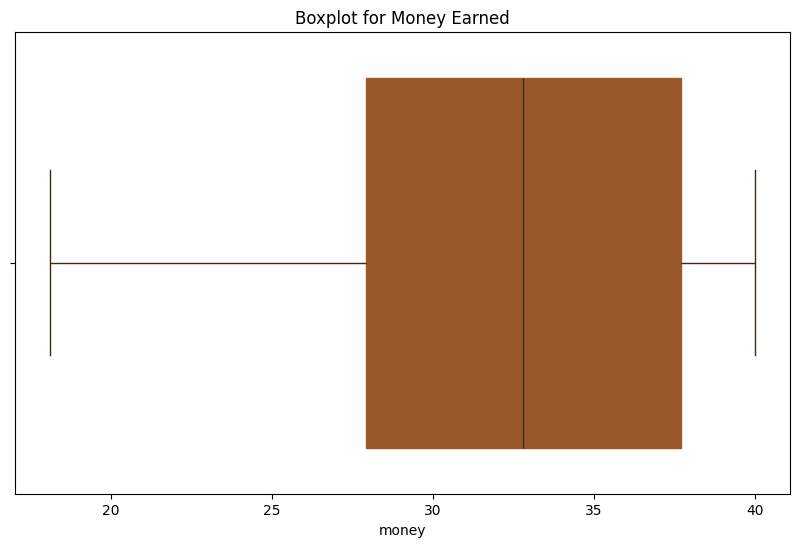

In [28]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=ml_df['money'], color="#99582A",
            boxprops=dict(facecolor="#99582A", color="#99582A"),
            whiskerprops=dict(color="#432818"),
            capprops=dict(color="#432818"),
            medianprops=dict(color='#432818'),
            flierprops=dict(markerfacecolor='#432818', markeredgecolor='#432818'))

plt.title('Boxplot for Money Earned')
plt.show()

<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> As we can notice that, there is no outliers present in dataset. Hence, no need to remove any outliers.

</h3>

<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Split Dataset &#9749;</h1>

In [29]:
# Split dataset into Train and Test data

X = ml_df.drop(columns=['money'])
y = ml_df['money']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Model 1 : Linear Regression &#9749;</h1>

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_y_pred)

lr_r2 = r2_score(y_test, lr_y_pred)


print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")

Mean Squared Error (MSE): 1.39
R-squared: 0.95


<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Model 2 : Decision Tree &#9749;</h1>

In [31]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)

dt_r2 = r2_score(y_test, dt_y_pred)


print(f"Mean Squared Error (MSE): {dt_mse:.2f}")
print(f"R-squared: {dt_r2:.2f}")

Mean Squared Error (MSE): 0.24
R-squared: 0.99


<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Model 3 : Random Forest &#9749;</h1>

In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)

rf_r2 = r2_score(y_test, rf_y_pred)


print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

Mean Squared Error (MSE): 0.20
R-squared: 0.99


<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500">&#9749; Model 4 : Gradient Boosting &#9749;</h1>

In [33]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_y_pred)

gb_r2 = r2_score(y_test, gb_y_pred)


print(f"Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")

Mean Squared Error (MSE): 0.32
R-squared: 0.99


<h3 style="color: #9D6B53; font-size: 24px; font-weight: 500"> 

<span style="color: #774936;">&#9749; Observation :</span> 

R-squared : 
Also known as the coefficient of determination, this metric measures the proportion of the variance in the outcome variable that is explained by the model. It ranges from 0 to 1, with 1 indicating a perfect fit. 

In above models, **Decision Tree**, **Random Forest** and **Gradient Boosting** are perfect fit due to their value of **R-squared is near to 1**

But, We will use **Random Forest** for prediction because **Mean Squared Error (MSE)** value is lower than other models in above.
</h3>

<h1 style="color: #774936; text-align: center; font-size: 32px; font-weight: 500">&#9749; <u>Next Month Sales Prediction and Sales Comparison with Current & Previous Month</u> &#9749;</h1>

In [34]:
latest_month_year = ml_df[['month', 'year']].max()

current_month = latest_month_year['month']
current_year = latest_month_year['year']

current_month_sales_dynamic = ml_df[(ml_df['month'] == current_month) & (ml_df['year'] == current_year)]['money'].sum()

prev_month = current_month - 1
prev_year = current_year
if prev_month < 1:
    prev_month = 12
    prev_year -= 1

prev_month_sales_dynamic = ml_df[(ml_df['month'] == prev_month) & (ml_df['year'] == prev_year)]['money'].sum()

monthly_sales = ml_df.groupby(['year', 'month'])['money'].sum().reset_index()

monthly_sales['month_year'] = monthly_sales['year'] * 100 + monthly_sales['month']
X = monthly_sales[['month', 'year']]
y = monthly_sales['money']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

next_month_dynamic = current_month + 1
next_year_dynamic = current_year
if next_month_dynamic > 12:
    next_month_dynamic = 1
    next_year_dynamic += 1

next_month_data_dynamic = pd.DataFrame({'month': [next_month_dynamic], 'year': [next_year_dynamic]})
next_month_sales_dynamic_rf = rf_model.predict(next_month_data_dynamic)[0]

current_month_name = calendar.month_name[current_month]
prev_month_name = calendar.month_name[prev_month]
next_month_name = calendar.month_name[next_month_dynamic]

results_dynamic_rf = {
    "Month": [prev_month_name, current_month_name, next_month_name],
    "Total Sales": [prev_month_sales_dynamic, current_month_sales_dynamic, next_month_sales_dynamic_rf]
}

results_dynamic_rf_df = pd.DataFrame(results_dynamic_rf)

results_dynamic_rf_df

,Month,Total Sales
0,July,6915.9400
1,August,7359.1400
2,September,7285.3638


In [35]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=results_dynamic_rf_df['Month'][:-1], y=results_dynamic_rf_df['Total Sales'][:-1],
                         mode='lines+markers', name='Actual Sales', line=dict(color='#774936')))

fig.add_trace(go.Scatter(x=results_dynamic_rf_df['Month'][-2:], y=results_dynamic_rf_df['Total Sales'][-2:],
                         mode='lines+markers', name='Predicted Sales',
                         line=dict(color='red', dash='dot')))

fig.update_layout(title='Next Month Sales Prediction and Comparison with Current and Previuos Months',
                  xaxis_title='Month',
                  yaxis_title='Total Sales ($)',
                  showlegend=True)

fig.update_traces(
    hoverlabel=dict(
        bgcolor='#774936',
        font=dict(
            color='#ffffff'
        )
    )
)

fig.show()

<h1 style="color: #774936; text-align: center; font-size: 24px; font-weight: 500"> 
---------------------------------------------------------- &#9749; THANK YOU &#9749; ---------------------------------------------------------- </h1>